# Data formating

Training image shape:  (10000, 2)
Training image shape:  object
Image format:  [1 array([0., 0., 0., ..., 0., 0., 0.])]
Training labels shape:  (10000,)


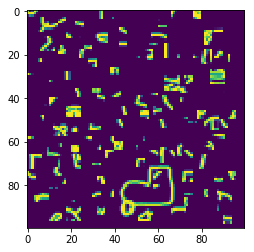

In [66]:
import os
import pickle
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# load training images with numpy
images_train = np.load('train_images.npy', encoding='latin1')
print("Training image shape: ",images_train.shape)
print("Training image shape: ",images_train.dtype)
print("Image format: ", (images_train[:][1]))

# load labels with numpy
train_labels = np.genfromtxt('train_labels.csv', names=True, delimiter=',', dtype=[('Id', 'i8'), ('Category', 'S5')])
print("Training labels shape: ", train_labels.shape)

#Reshaping image to 100x100
image_train1 = (images_train[32][1]).reshape(100,100)
plt.imshow(image_train1)


In [56]:
#Printing label
number_of_classes = np.unique(train_labels['Category']).size
print("Number of classes: ", number_of_classes)
# Mapping string name to class number:

class_names = np.unique(train_labels['Category'])
print(class_names)

def get_class_nb(lable):
    return np.argwhere(class_names == lable).item()

def get_class_name(indx):
    return class_names[indx]

class_nb_example = get_class_nb(train_labels[0]['Category'])
print()
print("Example: ", train_labels[0]['Category'], " is class number ", class_nb_example)
print("Example reverse:", class_nb_example, " is ", get_class_name(class_nb_example))


Number of classes:  31
[b'apple' b'empty' b'moust' b'mouth' b'mug' b'nail' b'nose' b'octag'
 b'paint' b'panda' b'parro' b'peanu' b'pear' b'penci' b'pengu' b'pillo'
 b'pinea' b'pool' b'rabbi' b'rhino' b'rifle' b'rolle' b'sailb' b'scorp'
 b'screw' b'shove' b'sink' b'skate' b'skull' b'spoon' b'squig']

Example:  b'shove'  is class number  25
Example reverse: 25  is  b'shove'


In [ ]:
# Replace string labels with class numbers
# To map it back to the lable, use get_class_name




Image shape:  (10000, 2)
Image ID:  0


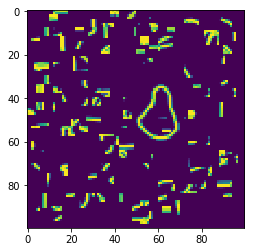

In [68]:
#Load test images with numpy
images_test = np.load('test_images.npy', encoding='latin1')
print("Image shape: ", images_test.shape)

# Reshape test images
print("Image ID: ", images_test[0][0])
image_test1 = (images_test[1][1]).reshape(100,100)
plt.imshow(image_test1)

In [5]:
# If a GPU is available, use it
# Pytorch uses an elegant way to keep the code device agnostic
if torch.cuda.is_available():
    device = torch.device("cuda")
    use_cuda = True
else:
    device = torch.device("cpu")
    use_cuda = False
    
print(device)

cuda


In [76]:
# Converting numpy array to pytorch
train_tensor = torch.stack([torch.Tensor(np.array(i).reshape((100, 100))) for i in (images_train[:,1])]).to(device)
test_tensor = torch.stack([torch.Tensor(np.array(i).reshape((100, 100))) for i in (images_test[:,1])]).to(device)

train_label_converted = np.stack([get_class_nb(i) for i in train_labels["Category"]])
label_tensor = torch.from_numpy(train_label_converted).to(device)


# Model definition

In [78]:
# Creating dataloaders
import torch.utils.data as data_utils
from torch.utils.data.sampler import (SubsetRandomSampler,
                                      RandomSampler)

# This is the subset of Kaggle images we want to overfit
train = data_utils.TensorDataset(train_tensor, label_tensor)
train_loader = data_utils.DataLoader(train, batch_size=50) # shuffle=True

This is the shape of one batch of inputs torch.Size([50, 100, 100])
This is the shape of one batch of targets torch.Size([50])
This is an image of  b'shove'


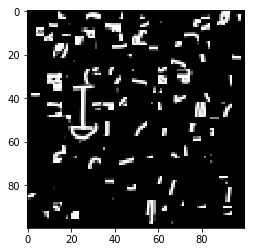

In [81]:
# Validating dataloader format
for inputs, targets in train_loader:
    print(f"This is the shape of one batch of inputs {inputs.shape}")
    print(f"This is the shape of one batch of targets {targets.shape}")
    print("This is an image of class", get_class_name(targets[0]))

#           " What is the meaning of each dimension?")
#     print("target", targets.shape, targets)
    img = inputs[0]
    plt.imshow(img, cmap='Greys_r')
    break